<h1> Modelling <span class="tocSkip"></span></h1>

**This notebook has changed significantly since I completed the BrainStation bootcamp.**  I improved the pipeline significantly and got new results. Previously, I had discussed the old results in some length which I have now removed.

**The most important improvements I would make** were I to continue this project would be to:

- Separate this notebook out into two shorter ones
- Add graphs clarifying the steps and showcasing model results
- Add more descriptions of why I am doing each step

---

Having ran a baseline model, and having conducted further preprocessing, I would now like to see whether I can replicate similar steps to Story et al. and see how different preprocessing steps affect the performance of models.

I will begin by replicating their steps, but just training a single classifier.  Then I will evaluate the results. This will be section 1 of this notebook.

Then, in section 2, having demonstrated the steps, I will build functions for training models to use to train multiple classifiers.

This will give results for all classifiers that I can then discuss.

Finally I can run my most promising models on the test set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Crafted-Features-and-Sentence-Filtering" data-toc-modified-id="Crafted-Features-and-Sentence-Filtering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Crafted Features and Sentence Filtering</a></span></li><li><span><a href="#Section-1" data-toc-modified-id="Section-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Section 1</a></span><ul class="toc-item"><li><span><a href="#Loading-data-and-splitting-into-train/validate/test" data-toc-modified-id="Loading-data-and-splitting-into-train/validate/test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading data and splitting into train/validate/test</a></span></li></ul></li><li><span><a href="#Step-1:-select-classifier:-&quot;1st_party&quot;" data-toc-modified-id="Step-1:-select-classifier:-&quot;1st_party&quot;-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 1: select classifier: "1st_party"</a></span></li><li><span><a href="#Step-2:-Separate-into-X-and-y" data-toc-modified-id="Step-2:-Separate-into-X-and-y-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 2: Separate into X and y</a></span></li><li><span><a href="#Step-3:-Set-up-filter-for-sentence-filtering-to-use-in-Pipeline" data-toc-modified-id="Step-3:-Set-up-filter-for-sentence-filtering-to-use-in-Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 3: Set up filter for sentence filtering to use in Pipeline</a></span></li><li><span><a href="#Step-4:-Set-up-for-tf-idf-matrix-to-use-in-Pipeline" data-toc-modified-id="Step-4:-Set-up-for-tf-idf-matrix-to-use-in-Pipeline-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 4: Set up for tf-idf matrix to use in Pipeline</a></span></li><li><span><a href="#Step-5:-5-fold-CV-Grid-Search" data-toc-modified-id="Step-5:-5-fold-CV-Grid-Search-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 5: 5-fold CV Grid Search</a></span></li><li><span><a href="#Evaluation-on-Train-dataset" data-toc-modified-id="Evaluation-on-Train-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluation on Train dataset</a></span></li><li><span><a href="#Evaluation-on-Validation-dataset" data-toc-modified-id="Evaluation-on-Validation-dataset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluation on Validation dataset</a></span></li><li><span><a href="#Section-2:-modelling-pipeline" data-toc-modified-id="Section-2:-modelling-pipeline-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Section 2: modelling pipeline</a></span><ul class="toc-item"><li><span><a href="#Requirements-for-modelling-pipeline" data-toc-modified-id="Requirements-for-modelling-pipeline-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Requirements for modelling pipeline</a></span></li><li><span><a href="#Demonstrating-how-we-can-view-the-results" data-toc-modified-id="Demonstrating-how-we-can-view-the-results-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Demonstrating how we can view the results</a></span></li></ul></li><li><span><a href="#Discussing-results" data-toc-modified-id="Discussing-results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Discussing results</a></span><ul class="toc-item"><li><span><a href="#Strong-negative-F1-score" data-toc-modified-id="Strong-negative-F1-score-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Strong negative F1 score</a></span></li><li><span><a href="#Varied-positive-F1-score" data-toc-modified-id="Varied-positive-F1-score-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Varied positive F1 score</a></span></li><li><span><a href="#Lowest-score---'Identifier_Mobile_Carrier'" data-toc-modified-id="Lowest-score---'Identifier_Mobile_Carrier'-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Lowest score - 'Identifier_Mobile_Carrier'</a></span></li><li><span><a href="#Comparison-to-results-from-the-paper" data-toc-modified-id="Comparison-to-results-from-the-paper-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Comparison to results from the paper</a></span></li><li><span><a href="#Effects-of-Differing-pre-processing-techniques-and-models" data-toc-modified-id="Effects-of-Differing-pre-processing-techniques-and-models-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Effects of Differing pre-processing techniques and models</a></span></li></ul></li><li><span><a href="#Final-model-performance-on-test-set" data-toc-modified-id="Final-model-performance-on-test-set-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Final model performance on test set</a></span></li><li><span><a href="#Further-work" data-toc-modified-id="Further-work-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Further work</a></span></li></ul></div>

The steps in this notebook are:

<font size= "4"> **Section 1** </font>

- Load data and split into Train/Validate/Test

    - For demonstrative purposes I will begin by running through the modelling steps for just a single classifier: 1st Party
    

- Separating into X and y
  - X, the input data to the model, is a union of the crafted features columns and a tf-idf matrix


- 5-fold cross-validation grid search
  - Over Sentence Filtering, whether to include bigrams in the tf-idf matrix and the hyperparameters for SVM model and  as performed by Story et al.
  - Additionally I opt to search over a default logistic regression classifier for comparison


- Evaluation on train dataset


- Evaluation on validation set and review.

<font size= "4"> **Section 2** </font>

Having demonstrated the steps for model construction for one classifier, I move to create a pipeline to train multiple classifiers.

The full pipeline consists of a series of functions that allows me to train a classifier for each of the 18 targets of interest. The steps are:

- Listing the requirements for the pipeline

- Functions for the pipeline
  - These correspond to the steps executed above for ‘1st party’

- Display of all model scores

- Discussion of some zero scores

- Further discussion

- Final model performance

# Crafted Features and Sentence Filtering

I have discussed this in previous notebooks but will include it here for completion.

To try to improve classifier performance, Story et al. apply a preprocessing technique that they call Sentence Filtering. This involves filtering the data to only train a classifier on segments that contain a relevant feature for the target.  For example a short segment about location data wouldn't be used to train an email classifier because it wouldn't contain keywords such as "Email" or "Contact".

They do not explicitly specify that these features are equivalent to the crafted features but I am inferring that they are.

The effect of applying sentence filtering is that instead of a model being trained on all the data and there being class imbalance in favour of the negative class, a much greater proportion of the training data features the target being classified. The effect is similar to downsampling.

This will be a moderate approximation for a replication of most of their work. The main missing element will be better text pre-processing to get better results from the crafted features and sentence filtering.

In [3]:
import pandas as pd
from pandas import json_normalize
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import norm

import sys
import time
from collections import defaultdict
from collections import Counter

import priv_policy_manipulation_functions as priv_pol_funcs

# pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack

# modelling
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# modelling pipeline
from tempfile import mkdtemp
# from sklearn.pipeline import Pipeline # not required since using imbalanced learn
from imblearn.pipeline import Pipeline 
    # Using the pipeline from the imbalanced learn library since it allows for sampling
from imblearn import FunctionSampler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# modelling evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Section 1
## Loading data and splitting into train/validate/test

**Creating Train, Validate and Test dataframes to use.** <br/> Story et al. already randomly split them into training, validation and test. They do not explain that this split was stratified by any classifier.  The proportions of the splits that they use seem standard for common data science practice – above a 25% test split.  

I am suspicious that there is not enough data in this domain to train some classifiers so I would have preferred this proportion to be lower, closer to 25% or perhaps slightly below.  (But I think this would have been difficult for Story et al. to know in advance and they may have had an idea already since they were building on earlier work.)

In [2]:
# Load the data
df_for_pipelining = pd.read_pickle("objects/crafted_features_df.pkl")

# Create separate dataframes for each group
df_for_pipelining_train = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'TRAINING' ].copy()
df_for_pipelining_val = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'VALIDATION' ].copy()
df_for_pipelining_test = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'TEST' ].copy()

# now that I have used the 'policy type' column for referring to train/validate/test, 
# I can delete that column along with other unneccesary columns.
for dataframe in [df_for_pipelining_train, df_for_pipelining_val, df_for_pipelining_test]:
    dataframe.drop(columns=['source_policy_number', 'policy_type', 'contains_synthetic',
           'policy_segment_id', 'annotations', 'sentences'], inplace=True)
    dataframe.reset_index(inplace=True, drop=True)

Sanity Check – Seeing the shapes of the dataframe – number of observations and confirming the number of columns

In [3]:
print(df_for_pipelining_train.shape)
print(df_for_pipelining_val.shape)
print(df_for_pipelining_test.shape)

(8068, 511)
(2651, 511)
(4824, 511)


In [4]:
# annotation features to use for sentence filtering later
clean_annotation_features = pd.read_pickle("objects/clean_annotation_features.pkl")

# Step 1: select classifier: "1st_party"

Let's start with 1st Party as an example.

In [5]:
classifier = "1st_party"

# Step 2: Separate into X and y



In [6]:
# Separate into X and y
# the crafted features columns happen to be all those after and including 'contact info', so I 
# use every column after and including the first crafted feature, which happens to be 'contact info'
X = pd.concat(
    [df_for_pipelining_train['segment_text'], 
     df_for_pipelining_train.loc[:,'contact info':]],
    axis=1
).copy()

print("Should be left with the 476 different crafted features (CFs), plus one segment text column.")
print(f"X shape is: {X.shape}")

y = df_for_pipelining_train[classifier]

Should be left with the 476 different crafted features (CFs), plus one segment text column.
X shape is: (8068, 477)


Now we have our input data and target ready to pass into our model.

# Step 3: Set up filter for sentence filtering to use in Pipeline

Retrieving the crafted features for 1st Party to use for sentence filtering:

In [7]:
# filtering the table to get the list object from the same row that lists the classifier
classifier_features = clean_annotation_features[ clean_annotation_features['annotation'] == classifier ]     \
                        .reset_index().at[0,'features']

classifier_features

['we', 'you', 'us', 'our', 'the app', 'the software']

Filter for the dataframe to get rows where any of those features is 1:

In [8]:
# true/false boolean series for sentence filtering:
sf_filter = ((X[classifier_features] > 0)\
                 .sum(axis=1) > 0 )

Filter for the dataframe to conduct balanced downsize filtering. This is a feature of my sentence_filtering function to filter less stringently if there is not enough data left after using the sf_filter.

In [9]:
# true/false boolean series for balanced downsizing filter:
positive_rows = (y == 1)
negative_rows = (y == 0)
balanced_downsize_filter = (
    positive_rows |
    negative_rows.where(negative_rows == True).dropna().sample(n=positive_rows.sum(), replace=False)
)

These arguments will be passed into the sentence filtering function during the pipeline

In [10]:
sf_kw_args = {'df_filter': sf_filter, 'sf_filter': sf_filter, 'balanced_downsize_filter': balanced_downsize_filter}

# Step 4: Set up for tf-idf matrix to use in Pipeline

Using 'column transformer' in the pipeline, and by creating the tf-idf objects in advance, we don't need to manually create the tf-idf matrix, fit it to the data, or transform the data with it, or combine the resulting sparse matrix with the crafted features dataframe.

In [11]:
# tf-idf functions to use
tfidf_unigrams = TfidfVectorizer(ngram_range=(1,1), stop_words='english', binary=True)
tfidf_withbigrams = TfidfVectorizer(ngram_range=(1,2), stop_words='english', binary=True)

# Create the column transformations list with columns to apply to (for the column transformer)
col_transform_unigrams = [('unigrams_only', tfidf_unigrams, 'segment_text')]
col_transform_withbigrams = [('with_bigrams', tfidf_withbigrams, 'segment_text')]

# Step 5: 5-fold CV Grid Search

There are multiple things going on here that are worth explaining:
- 5-fold CV (cross-validation)
- Model of choice: SVM
- Hyperparameter Grid Search
- A note on scoring

**5-fold Cross Validation**

The technique involves partitioning the dataset into five folds, each of which is used in turn as a test set while the remaining folds are used as training data for a model. This process is repeated a number of times, with each fold being used as a test set once. The average performance across all test sets is then used to judge the model's performance.

This means that each different model being tested in the grid search is trained and tested 5 times. This approach can be computationally intensive, but it often results in a more accurate estimate of the model's true performance, because each model is being tested on data that it hasn't seen.

**Model of Choice: SVM (Support Vector Machines)**

Of all possible machine learning models, Story et al. exclusively mention SVM. I presume that other models were not discussed because:
- they were building on earlier work informing them of how to find success with SVM in this domain, or
- neglected to explain all the other model searching they conducted

SVM is a supervised machine learning algorithm that can be used for both classification and regression tasks. In the n-dimensional space of training datapoints, the SVM algorithm finds the hyperplane that maximizes the margin between the data of the two classes (i.e. the decision boundary). The margin is defined as the distance between the hyperplane and the closest data points.  The closest data points to the margin are used to construct the hyperplane and are thus called the 'support vectors'. This image helps demonstrate the idea. The Kernel is a transformation to help separate the classes.

<img src="https://www.analytixlabs.co.in/blog/wp-content/uploads/2021/07/Blog-08-1-1536x832.jpg" alt="An example of SVM. Image from analytixlabs" width=700/>

*Image source: analytixlabs*

The SVM algorithm has a number of advantages, including its ability to handle non-linear decision boundaries, its robustness to overfitting, and its efficiency in high-dimensional spaces such as with text data.

In general the time complexity for support vector machines is between O(m * n^2) and O(m * n^3), where m is the number of features and n is the number of training examples, but it is more complex than this and can be specific to different kernels.  I find greatly increasing training time with more observations. But with this small dataset, given the width of the data, the training times are very manageable.

I recommend [Sci-kit Learn's page](https://scikit-learn.org/stable/modules/svm.html) to learn more.

**SVM: Which hyperparameters can be tuned?**

Story et al. state: "we use scikit-learn’s SVC (Support Vector Classification) implementation (scikit-learn developers 2016b). We train those with a linear kernel (kernel=’linear’), balanced class weights (class weight=’balanced’), and a grid search with five-fold cross-validation over the penalty (C=[0.1, 1, 10]) and gamma (gamma=[0.001, 0.01, 0.1]) parameters.

- The Kernel function for transformation, e.g. rbf, polynomial, linear. Having decided that Linear is suitable for this problem, Story et al. only consider a linear kernel, which is known to perform well on text data.
- C. Decreasing C corresponds to more regularization. The C parameter adds a penalty for each incorrect classification, so a smaller C value results in a decision boundary with a larger margin, but may also result in a higher number of misclassifications.
- Gamma. This is not relevant for linear kernels so I'm unsure why they have included it. (See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) ). It is possible that it was left there as an error after the researchers tried different kernels. The code runs either way.  Although I want to include it in case the researchers had some reason, to save computation time I will not include it in my grid search.

**Grid Search**
To find the best model for each target, we want to find the combination of pre-processing steps and hyperparameters that gives the best results. So for each classifier, we train and evaluate models for each different combination of pre-processing steps and hyperparameters. Effectively, this 'grid' of steps and hyperparameters is searched over to find the best model.

In this case, we are searching over:

- Sentence filtering or not
- tfidf with only unigrams or unigrams and bigrams
- SVC with C=[0.1, 1, 10], OR
- if not SVC, logistic regression.

**Scoring**

I am electing to assess each model's performance by the F1 score (harmonic mean of precision and recall). The F1 metric is an important metric for Story et al.'s work so this will help me compare.

In [12]:
# cachedir = mkdtemp() # Optional memory dump to help with processing

# In the pipeline_sequences list, the syntax requires that each step is named and some value is provided,
# but that value will be changed as each different option is looped through in the parameter grid.
pipeline_sequences = [
    ('sentence_filtering', FunctionSampler(func=priv_pol_funcs.sentence_filtering, validate=False, kw_args=sf_kw_args)),
    ('tfidf', ColumnTransformer(col_transform_withbigrams, remainder='passthrough')), 
    ('model', LogisticRegression(random_state=1, max_iter=1000))
]

pipe = Pipeline(pipeline_sequences) #, memory = cachedir)

param_grid = [
    {
        'model': [LogisticRegression(random_state=1, max_iter=1000)],
        'sentence_filtering': [FunctionSampler(func=priv_pol_funcs.sentence_filtering, validate=False, kw_args=sf_kw_args), 
                               None],
        'tfidf': [ColumnTransformer(col_transform_withbigrams, remainder='passthrough'),
                  ColumnTransformer(col_transform_unigrams, remainder='passthrough')]
    },
    {
        'model': [SVC(kernel='linear', class_weight='balanced', random_state=1)],
        'model__C': [0.1, 1, 10],
        'sentence_filtering': [FunctionSampler(func=priv_pol_funcs.sentence_filtering, validate=False, kw_args=sf_kw_args), 
                               None],
        'tfidf': [ColumnTransformer(col_transform_withbigrams, remainder='passthrough'),
                  ColumnTransformer(col_transform_unigrams, remainder='passthrough')]
    }
]

# Create grid search object
grid_search_object = GridSearchCV(estimator=pipe, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1, scoring='f1')


In [13]:
%%time
fitted_search = grid_search_object.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/chinchcliffe/opt/anaconda3/envs/priv_pol_nlp/lib/python3.10/site-packages/imblearn/pipeline.py:240: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/Users/chinchcliffe/opt/anaconda3/envs/priv_pol_nlp/lib/python3.10/site-packages/imblearn/pipeline.py:240: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib'

CPU times: user 11.3 s, sys: 397 ms, total: 11.7 s
Wall time: 1min 31s


# Evaluation on Train dataset

In [14]:
classifier_prediction = fitted_search.predict(X)
print(classification_report(y, classifier_prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6235
           1       0.93      1.00      0.96      1833

    accuracy                           0.98      8068
   macro avg       0.97      0.99      0.98      8068
weighted avg       0.98      0.98      0.98      8068



These seem like healthy scores across the board but they are all quite high so there is a risk of overfitting.  I will discuss the results once evaluating the score on the validation set, which allows me to compare to Story et al.

# Evaluation on Validation dataset

Loading the X and y data

In [15]:
Xval = pd.concat(
    [df_for_pipelining_val['segment_text'], 
     df_for_pipelining_val.loc[:,'contact info':]],
    axis=1
).copy()

yval = df_for_pipelining_val[classifier]

**Storing the model results** 

I create a series to store the results for each classifier I could make.

For each model, I will create a list with 3 values: the fitted search object, the y values and the y predictions. Then each of those lists is stored in a series where the index is the classifier.

In [16]:
list_of_18_classifiers = ['Contact', 'Contact_E_Mail_Address', 'Contact_Phone_Number', 
                       'Identifier_Cookie_or_similar_Tech', 'Identifier_Device_ID', 'Identifier_IMEI',
                        'Identifier_MAC', 'Identifier_Mobile_Carrier',
                        'Location', 'Location_Cell_Tower', 'Location_GPS', 'Location_WiFi',
                        'SSO', 'Facebook_SSO',
                        '1st_party', '3rd_party',
                        'PERFORMED', 'NOT_PERFORMED'] # cross-checked from table on pg 4 of the paper

model_results = pd.Series(range(len(list_of_18_classifiers)),
                          index=list_of_18_classifiers, dtype=object)

Running the model and saving the results:

In [17]:
# Running the model
classifier_val_prediction = fitted_search.predict(Xval)

# saving the model results for future use
model_results[classifier] = [fitted_search, yval, classifier_val_prediction]
model_results.to_pickle("objects/model_results.pkl")

Showing confusion matrix and classification report:

In [18]:
def show_confusion_matrix(classifier_y_val, classifier_val_prediction):
    """
    Put the actual y values and the predicted y values into a dataframe with labels and display it
    """
    cf_matrix = confusion_matrix(classifier_y_val, classifier_val_prediction)
    cf_df = pd.DataFrame(
        cf_matrix, columns=["Predicted Negative", "Predicted Positive"], index=["True Negative", "True Positive"])
    display(cf_df)

In [19]:
show_confusion_matrix(yval, classifier_val_prediction)

,Predicted Negative,Predicted Positive
True Negative,1866,108
True Positive,86,591


In [20]:
print(classification_report(yval, classifier_val_prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1974
           1       0.85      0.87      0.86       677

    accuracy                           0.93      2651
   macro avg       0.90      0.91      0.90      2651
weighted avg       0.93      0.93      0.93      2651



**Scoring**

Only the F1 scores of each classifier is given in the paper (Table 1 pg 4). I assume that this is F1 for class 1, and so we can use that for direct comparison.

Looks like this scored okay.  Looking at the scores on both the training and validation data, there is somewhat of a gap between the two which implies some overfitting.

Reviewing whether to focus on Positive F1 score or the negative F1 score:

"Negative F-1 score" is important because it relates to when a policy fails to mention an important practice (relevant for detecting violations, important to Story et al.).  We want to be sure that if a policy fails to mention it, the classifier correctly states that it is not mentioned.

Relatedly Negative Recall is the proportion of *When it was not in, did it say that it was not in?*<br>
Negative Precision is *When it predicted that it wasn't in, how often was that the case?*

Positive recall is *When it was in, what was the chance it was identified?*  <br>
Positive precision is *When it was predicted to be in, what was the chance that it was in?*

# Section 2: modelling pipeline

Now I can apply the same steps to every classifier to be trained.

Firstly, what are the required inputs I need to be ready before training all the classifiers?

## Requirements for modelling pipeline

1. List of all the different classifiers to train
2. Empty table of classifier results to populate
3. `df_for_pipelining_train/val/test`. This is the appropriate dataframe with all the X and y data.
4. tf-idf column transformers to use in the pipeline.
5. Annotation features to use for sentence filtering

In [17]:
# repeating this list here so that the below cells can all be ran without running any above cells

# Requirement 1: List of all the different classifiers to train
list_of_18_classifiers = ['Contact', 'Contact_E_Mail_Address', 'Contact_Phone_Number', 
                       'Identifier_Cookie_or_similar_Tech', 'Identifier_Device_ID', 'Identifier_IMEI',
                        'Identifier_MAC', 'Identifier_Mobile_Carrier',
                        'Location', 'Location_Cell_Tower', 'Location_GPS', 'Location_WiFi',
                        'SSO', 'Facebook_SSO',
                        '1st_party', '3rd_party',
                        'PERFORMED', 'NOT_PERFORMED'] # cross-checked from table on pg 4 of the paper

# Requirement 2: Empty table of classifier results to populate
model_results = pd.Series(range(len(list_of_18_classifiers)),
                          index=list_of_18_classifiers, dtype=object)

In [18]:
# Requirement 3: Loading the data

df_for_pipelining = pd.read_pickle("objects/crafted_features_df.pkl")

# Create separate dataframes for each group
df_for_pipelining_train = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'TRAINING' ].copy()
df_for_pipelining_val = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'VALIDATION' ].copy()
df_for_pipelining_test = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'TEST' ].copy()

# now that I have used the 'policy type' column for referring to train/validate/test, 
# I can delete that column along with other unneccesary columns.
for dataframe in [df_for_pipelining_train, df_for_pipelining_val, df_for_pipelining_test]:
    dataframe.drop(columns=['source_policy_number', 'policy_type', 'contains_synthetic',
           'policy_segment_id', 'annotations', 'sentences'], inplace=True)
    dataframe.reset_index(inplace=True, drop=True)

In [19]:
# Requirement 4: tf-idf column transformers to use in the pipeline

tfidf_unigrams = TfidfVectorizer(ngram_range=(1,1), stop_words='english', binary=True)
tfidf_withbigrams = TfidfVectorizer(ngram_range=(1,2), stop_words='english', binary=True)

# Create the column transformations list with columns to apply to (for the column transformer)
col_transform_unigrams = [('unigrams_only', tfidf_unigrams, 'segment_text')]
col_transform_withbigrams = [('with_bigrams', tfidf_withbigrams, 'segment_text')]

In [20]:
# Requirement 5: annotation features for sentence filtering
clean_annotation_features = pd.read_pickle("objects/clean_annotation_features.pkl")

Next, what are the required steps that will happen in training and evaluating each different classifier?

The steps are:

- Select the classifier
- Separate the training data into X and y
- Set up filter for sentence filtering to use in Pipeline
- CV Grid Search
- Separate the validation data into X and y, run the model on them and save the results

To save space in this notebook, I have put the code blocks into the priv_policy_manipulation_functions file.

Pass every different classifier into the modelling pipeline:

**! This takes 10 minutes to run**

In [21]:
initial_results = model_results.copy()

In [22]:
for each_classifier in list_of_18_classifiers:
    
    priv_pol_funcs.full_modelling_pipeline(classifier=each_classifier, df_for_pipelining=df_for_pipelining_train, 
                    df_for_evaluation=df_for_pipelining_val, clean_annotation_features=clean_annotation_features,
                    model_results_series=initial_results,  
                col_transform_unigrams=col_transform_unigrams, col_transform_withbigrams=col_transform_withbigrams)

Running for classifier: Contact
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact was 25.7299

Running for classifier: Contact_E_Mail_Address
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact_E_Mail_Address was 34.85763

Running for classifier: Contact_Phone_Number
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact_Phone_Number was 33.02646

Running for classifier: Identifier_Cookie_or_similar_Tech
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Identifier_Cookie_or_similar_Tech was 25.79434

Running for classifier: Identifier_Device_ID
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Identifier_Device_ID was 26

In [23]:
# Saving the results under a new name
validate_results_series = pd.read_pickle("objects/model_results.pkl") 
validate_results_series.to_pickle("objects/validate_results_series.pkl")

## Demonstrating how we can view the results

The results for any classifier can then be retrieved from the results series. The series stores the model and the actual and predicted y-values in the form `[model_object, true_y, predicted_y]`

Here is how the best estimator or a classification report could be produced for one of the classifiers.

In [12]:
initial_results['Identifier_Device_ID'][0].best_estimator_

Pipeline(steps=[('sentence_filtering', None),
                ('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('with_bigrams',
                                                  TfidfVectorizer(binary=True,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'segment_text')])),
                ('model',
                 SVC(C=10, class_weight='balanced', kernel='linear',
                     random_state=1))])

In [13]:
print(classification_report(model_results_series['Contact_E_Mail_Address'][1] , 
                            model_results_series['Contact_E_Mail_Address'][2]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2429
           1       0.95      0.75      0.84       222

    accuracy                           0.98      2651
   macro avg       0.96      0.87      0.91      2651
weighted avg       0.98      0.98      0.97      2651



We can use the model results we have saved to populate a results table showing whatever statistics we want.

In [24]:
model_results_series = pd.read_pickle("objects/validate_results_series.pkl") 
# Loading the model results allows us to populate the table without having to run the grid searches again

full_results_table = pd.DataFrame(model_results_series, columns=["Frequency in train set"]).copy()

for classifier in model_results_series.index:
    
    fitted_search = model_results_series[classifier][0]

    # Total instances in dataset
    full_results_table.loc[classifier, "Frequency in train set"] = \
        df_for_pipelining_train[classifier].sum()

    # Neg F1
    full_results_table.loc[classifier, "Neg F1"] = \
        f1_score(model_results_series[classifier][1].copy(), model_results_series[classifier][2].copy(), pos_label=0)

    # Pos F1
    full_results_table.loc[classifier, "Pos F1"] = \
        f1_score(model_results_series[classifier][1].copy(), model_results_series[classifier][2].copy(), pos_label=1)

    # Sentence Filtering
    full_results_table.loc[classifier, "Sentence Filtering"] = \
        str(fitted_search.best_estimator_.steps[0][1])

    # Including Bigrams or not
    full_results_table.loc[classifier, "including bigrams or not"] = \
        fitted_search.best_estimator_.named_steps["tfidf"].get_params()["transformers"][0][0]

    # Model type
    full_results_table.loc[classifier, "SVM or Logistic Regression"] = \
        fitted_search.best_estimator_.named_steps["model"]

In [9]:
full_results_table

,Frequency in train set,Neg F1,Pos F1,Sentence Filtering,including bigrams or not,SVM or Logistic Regression
Contact,128,0.992875,0.660550,None,with_bigrams,"SVC(C=0.1, class_weight='balanced', kernel='li..."
Contact_E_Mail_Address,662,0.986949,0.839196,None,unigrams_only,"LogisticRegression(max_iter=1000, random_state=1)"
Contact_Phone_Number,346,0.991876,0.839216,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_Cookie_or_similar_Tech,596,0.990924,0.903084,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_Device_ID,332,0.994713,0.861538,None,with_bigrams,"SVC(C=10, class_weight='balanced', kernel='lin..."
Identifier_IMEI,50,0.999620,0.937500,None,with_bigrams,"SVC(C=0.1, class_weight='balanced', kernel='li..."
Identifier_MAC,85,0.998669,0.837209,None,unigrams_only,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_Mobile_Carrier,60,0.996014,0.363636,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Location,537,0.986813,0.825737,None,unigrams_only,"LogisticRegression(max_iter=1000, random_state=1)"
Location_Cell_Tower,89,0.995615,0.596491,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."


In [11]:
print(f"Negative F1 mean: {full_results_table['Neg F1'].mean()}")
print(f"Positive F1 mean: {full_results_table['Pos F1'].mean()}")

Negative F1 mean: 0.9872217712600695
Positive F1 mean: 0.7773976302357587


# Discussing results

There is much to discuss here and were I to extend this project I would discuss more.  I will touch on these elements:

- Strong negative F1 score
- Varied positive F1 score
- Lowest score – 'Identifier_Mobile_Carrier'
- Comparison to results from paper
- Effects of differing pre-processing techniques and models

## Strong negative F1 score

The negative F1 score refers to the harmonic mean of precision and recall for predicting instances when the class of interest is not present. In other words, it's a measure of *how well the classifier is able to correctly identify instances when the class is not present.*  A high negative F1 score suggests that the classifier is making very few false positives, i.e. it is not classifying negative instances as positive instances very often.

With many caveats, the score of 0.987 is very high.

**Imbalance in data**

It's worth noting that because of the imbalance in the training data, the classifiers likely have a bias towards predicting the majority class (i.e. the negative class in this case), which can artificially inflate the F1 score. Improvements were attempted to be made and are discussed in the section on the positive F1 score.

**Other evaluation metric**

I have not looked deeper into other evaluation metrics for identifying when the class is not present. Story et al. only discussed F1 scores and I have followed suit, but were I to extend this project, I would evaluate other performance metrics as well, like precision, recall and AUC-ROC to have a better understanding of the performance of the classifiers.

It is also important to evaluate the performance of the classifier on test set to get a realistic picture of the performance.

## Varied positive F1 score

The positive F1 score specifically refers to the harmonic mean of precision and recall for predicting instances when the class of interest is present. In other words, it's a measure of *how well the classifier is able to correctly identify instances when the class is present.*

A high positive F1 score suggests that the classifier is able to correctly identify positive instances while keeping the number of false negatives low. In other words, the classifier is able to identify the majority of instances of the positive class, while also keeping the number of instances that were actually positive but were not identified as such (false negatives) low.

The mean positive F1 score of 0.777 is relatively moderate performance and means that the classifiers are making more false negatives than false positives.

Despite evaluating the best model from the grid search based on positive F1 score, the negative F1 score is far higher than the positive F1 score.

It's likely that the imbalance in the training data is affecting the classifiers' ability to identify instances of the positive class. Sentence filtering was supposed to help with this, but as we can see from the table, it improved none of the classifiers. Other ways to improve this could be by upsampling the minority class, or using methods such as different ML models and weight balancing during training.

Another possible explanation for lower positive F1 score is that the positive class is more difficult to predict than the negative class, meaning that there is more noise in the positive class, more variations or more feature dependencies, which makes it harder for the classifier to identify positive instances.

As mentioned earlier, if I were to continue this project, I would dig deeper and also consider other performance metrics.

## Lowest score - 'Identifier_Mobile_Carrier'

A segment is annotated with 'Identifier_Mobile_Carrier' if the segment describes collection of the user's mobile carrier name or other mobile carrier identifier. Story et al. thought that relevant key words for this (Crafted Features) include

      - mobile network
      - mobile carrier
      - mobile operator
      - device carrier
      - carrier provider
      - wireless carrier/operator
      - wireless carrier
      - phone carrier
      - mobile service provider
      - mobile or internet carrier
      - carrier detail
      
Companies can use this data as a way of identifying the user, hence the 'Identifier' prefix on the annotation.

From looking at the table, there is extremely little training data (only 60 instances in training dataset).  Although some classifiers performed better with similar amounts of data, more data is almost always going to be helpful.

Let's also look at the confusion matrix.

In [13]:
show_confusion_matrix(model_results_series['Identifier_Mobile_Carrier'][1].copy(), 
                      model_results_series['Identifier_Mobile_Carrier'][2].copy())

,Predicted Negative,Predicted Positive
True Negative,2624,4
True Positive,17,6


In the validation dataset, there were only 23 positive examples. Such a small number of examples means that our results may not be representative of the model's average performance.

It may also be the case that neither the features nor the words in the segment are particularly indicative of whether the segment describes mobile carrier information.  

If I was to look more thoroughly, I would look at the examples that the model predicted as positive and at the factors that they had. 

**Training this many classifiers**

Given the large number of different classifiers being trained, there is a chance that at least one of them is poorly represented in the training set by chance of the random split, or other random factors in the validation data.

## Comparison to results from the paper

Story et al. only discuss positive F1 scores for how well a classifier predicts the existence of a class in a single segment, which is comparable to my work.  They discuss in more detail scores for predicting the existence of a class across an entire policy, which was outside the scope of my project.

Looking at the former, the table on [page 4](https://usableprivacy.org/static/files/story_pal_2019.pdf#page=4) of the paper shows that their baseline model results were quite high relative to mine.  This may have been due to different preprocessing and training techniques, since they did not go into much detail into these.

My scores did exceed theirs for a number of classifiers. Some of this appears to be due to using tf-idf with unigrams only when it improved performance for the classifier.  Differences in technique, along with some random elements, may also have affected our results.

## Effects of Differing pre-processing techniques and models

Only two of the 18 classifiers performed better using logistic regression than SVC. it makes sense that the majority of best classifiers used SVC because:

- SVC is known to perform well on text data. Reasons include linear SVC's ability to handle high dimensionality and sparse data.
- the researchers suggested a specific implementation of SVC based on their previous work which I used
- I didn't search over any range of hyperparameters for logistic regression

But I was interested to see that this baseline model (logistic regression) improved over tuned SVC in some cases.

5 of the 18 classifiers performed better when trained without including bigrams (including the two logistic regression classifiers). Generally I would expect that including bigrams would improve performance as it allows the model to take into account more context so I am not surprised that most models were improved with the inclusion of bigrams. Some of the reasons for the other 5 classifiers could be:
- For the two logistic regression models: logistic regression may not perform well when handling high dimensional data, so performance may increase when bigrams are excluded.
- Redundancy: Some bigrams may be very similar to the unigrams they are composed of, so including bigrams may add redundant information that does not improve the classifier's performance.
- Noise: Bigrams can also capture random combinations of words, which may add noise to the data and make it more difficult for the classifier to identify the important features.
- Overfitting: Bigrams increase the dimensionality of the data, which can lead to overfitting when the dataset is not large enough, which could be a problem with this dataset.

It is worth noting that these were just some approaches to feature selection and model selection. Further experimentation on different combinations of models, hyperparameters and feature selection could be done to check if the performance can be improved further.

# Final model performance on test set

Let's now evaluate the classifiers on an unseen test set to see how they generalize from unseen data.  I will train all classifiers using the Train and Validate data sets combined and test the score on the test set.

In [8]:
final_results = pd.Series(range(len(list_of_18_classifiers)),
                          index=list_of_18_classifiers, dtype=object)

In [9]:
df_for_pipelining = pd.read_pickle("objects/crafted_features_df.pkl")

df_for_pipelining_train_val = df_for_pipelining.loc[
    (df_for_pipelining['policy_type'] == 'TRAINING') | (df_for_pipelining['policy_type'] == 'VALIDATION')
].copy()
df_for_pipelining_test = df_for_pipelining.loc[df_for_pipelining['policy_type'] == 'TEST' ].copy()

for dataframe in [df_for_pipelining_train_val, df_for_pipelining_test]:
    dataframe.drop(columns=['source_policy_number', 'policy_type', 'contains_synthetic',
           'policy_segment_id', 'annotations', 'sentences'], inplace=True)
    dataframe.reset_index(inplace=True, drop=True)

In [10]:
# sanity check
df_for_pipelining_train_val.shape

(10719, 511)

Running modelling pipeline for all classifiers

**! This could take some time to run:**

In [11]:
for each_classifier in list_of_18_classifiers:
    
    priv_pol_funcs.full_modelling_pipeline(classifier = each_classifier, 
                                           df_for_pipelining = df_for_pipelining_train_val, 
                                           df_for_evaluation = df_for_pipelining_test, 
                                           clean_annotation_features = clean_annotation_features,
                                           model_results_series = final_results,  
                                           col_transform_unigrams = col_transform_unigrams, 
                                           col_transform_withbigrams = col_transform_withbigrams)

Running for classifier: Contact
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact was 38.52312

Running for classifier: Contact_E_Mail_Address
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact_E_Mail_Address was 73.43276

Running for classifier: Contact_Phone_Number
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Contact_Phone_Number was 48.84092

Running for classifier: Identifier_Cookie_or_similar_Tech
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Identifier_Cookie_or_similar_Tech was 41.73223

Running for classifier: Identifier_Device_ID
Ready for grid search.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Ready for evaluation
The runtime for Identifier_Device_ID was 4

In [12]:
final_model_results = pd.read_pickle("objects/model_results.pkl")

In [13]:
final_results_table = pd.DataFrame(final_model_results, columns=["Frequency in train set"]).copy()

for classifier in final_model_results.index:
    
    fitted_search = final_model_results[classifier][0]

    # Total instances in dataset
    final_results_table.loc[classifier, "Frequency in train set"] = \
        df_for_pipelining_train_val[classifier].sum()

    # Neg F1
    final_results_table.loc[classifier, "Neg F1"] = \
        f1_score(final_model_results[classifier][1].copy(), final_model_results[classifier][2].copy(), pos_label=0)

    # Pos F1
    final_results_table.loc[classifier, "Pos F1"] = \
        f1_score(final_model_results[classifier][1].copy(), final_model_results[classifier][2].copy(), pos_label=1)

    # Sentence Filtering
    final_results_table.loc[classifier, "Sentence Filtering"] = \
        str(fitted_search.best_estimator_.steps[0][1])

    # Including Bigrams or not
    final_results_table.loc[classifier, "including bigrams or not"] = \
        fitted_search.best_estimator_.named_steps["tfidf"].get_params()["transformers"][0][0]

    # Model type
    final_results_table.loc[classifier, "SVM or Logistic Regression"] = \
        fitted_search.best_estimator_.named_steps["model"]

In [15]:
final_results_table

,Frequency in train set,Neg F1,Pos F1,Sentence Filtering,including bigrams or not,SVM or Logistic Regression
Contact,169,0.993997,0.627451,None,with_bigrams,"SVC(C=0.1, class_weight='balanced', kernel='li..."
Contact_E_Mail_Address,884,0.985018,0.788069,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Contact_Phone_Number,476,0.993601,0.779412,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_Cookie_or_similar_Tech,818,0.992395,0.903683,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_Device_ID,430,0.994027,0.794118,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Identifier_IMEI,66,0.999270,0.885246,None,with_bigrams,"SVC(C=0.1, class_weight='balanced', kernel='li..."
Identifier_MAC,109,0.998853,0.800000,None,unigrams_only,"LogisticRegression(max_iter=1000, random_state=1)"
Identifier_Mobile_Carrier,83,0.998542,0.708333,None,with_bigrams,"SVC(C=1, class_weight='balanced', kernel='line..."
Location,722,0.992630,0.838863,None,unigrams_only,"LogisticRegression(max_iter=1000, random_state=1)"
Location_Cell_Tower,124,0.998959,0.782609,None,unigrams_only,"SVC(C=1, class_weight='balanced', kernel='line..."


If I were to work on this project further, I would make the table more easily readable for describing the model type and whether sentence filtering is included.

In [14]:
print(f"Negative F1 mean: {final_results_table['Neg F1'].mean()}")
print(f"Positive F1 mean: {final_results_table['Pos F1'].mean()}")

Negative F1 mean: 0.9903170275875532
Positive F1 mean: 0.734859898551982


By comparison:

**Average F1 scores** <br/>
For comparison: <br/>
- Validate Negative F1 mean: 0.987
- Validate Positive F1 mean: 0.777

F1 scores were slightly higher for negative F1 but 0.04 lower for positive F1. Perhaps the greater amount of data emphasised the effect of the class imbalance, or any number of other factors.

Looking at both scores, one conclusion could be that by increasing the amount of data being used, the model performance has not really increased, meaning that the limiting factors are probably in the model creation.

**Negative F1 Scores for individual classifiers**<br/>
On both the validation and test data, the lowest scoring classifiers were "1st Party" and "Performed", which are the two classifiers with the most examples and thus least class imbalance. 

**Positive F1 Scores for individual classifiers**<br/>
It is easier to see the differences with a graph

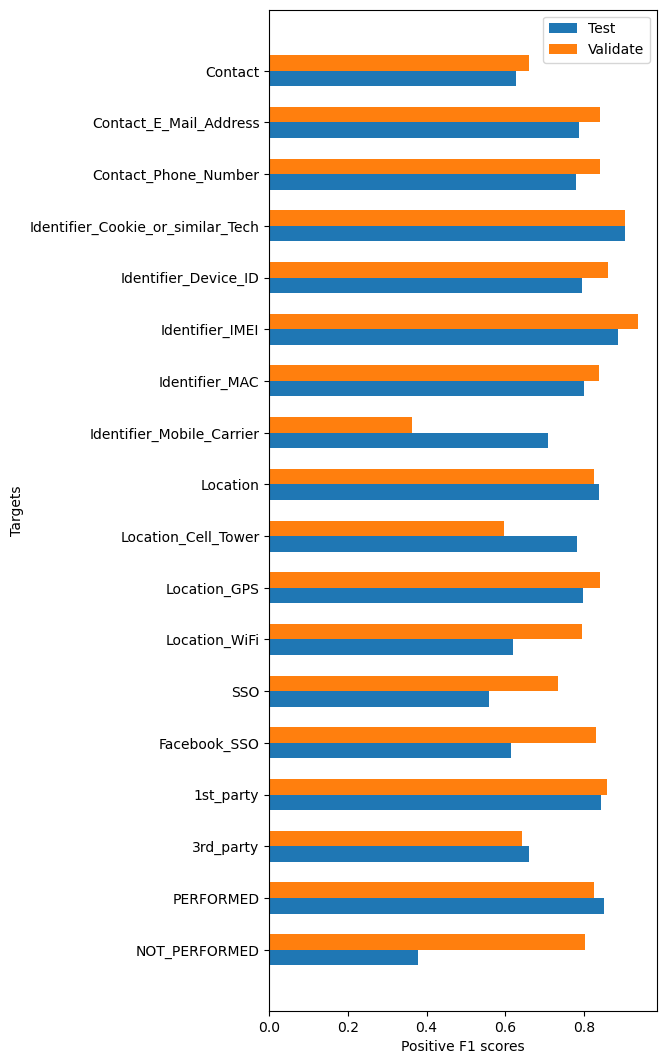

In [71]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(5, 13))

# Create the bar chart
bar_width = 0.30
bar1 = ax.barh(np.arange(len(final_results_table)), final_results_table['Pos F1'].loc[::-1], bar_width, label='Test')
bar2 = ax.barh(np.arange(len(full_results_table)) + bar_width, full_results_table['Pos F1'].loc[::-1], bar_width, label='Validate')

# Adding the legend and labels
ax.legend()
ax.set_ylabel('Targets')
ax.set_xlabel('Positive F1 scores')

# Set the xticks
ax.set_yticks(np.arange(len(full_results_table)) + bar_width/2)
ax.set_yticklabels(list(full_results_table.index)[::-1])

# Show the plot
plt.show()


There were good improvements for Identifier_mobile_carrier and location_cell_tower, but moderate drops in score for location_WiFi, SSO, Facebook_SSO, and especially NOT_PERFORMED.  These could be for many different reasons that I could explore were I to continue this project.

**Sentence Filtering**

As before, sentence filtering was not popular amongst the classifiers, but it is interesting to see that it is now preferred by "1st Party", which has the most examples.  Perhaps once a certain quantity of examples is reached, sentence filtering can become useful.

**Uni and bigrams**

Four classifiers preferred only using unigrams, down from 5, with some of the same classifiers preferring unigrams, so similar results here but it would be interesting to explore why these differences have arrived for the classifiers where there are differences.

**SVC or Logistic Regression**

As before, only two classifiers prefer logistic regression and both use unigrams only, but one of the specific classifiers is different.



# Further work

- It would be insightful to explore why different preprocessing steps or why different models have different effects on different classifiers when trained on this dataset
- Try training with data at the sentence level, as suggested by Story et al
- Improve the sentence filtering to include segments featuring any word from that classifier phrase, as this may improve the performance of the sentence filtering
- Try different models, e.g. naive bayes classifier
- Apply scaling. Every column is between 0 and 1 anyway so the effect would be small but it could have big effect for some classifiers
- Search over a wider range of hyperparameters

**Thanks for reading!**

---

---